In [299]:
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import twitter
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

from pandas import Series

import time



In [300]:
# Variables that contains the user credentials to access Twitter API 

api = twitter.Api(consumer_key='OcfcqAZGIvtUKWCEO9XfWhCjW',
                      consumer_secret='jnFRZ0daR2xdzy7IEjR6ih98ej44UO2ioEkZg95INwtefXyLJU',
                      access_token_key='54224760-OHpN11y0XuEoycqVaeXj3Bo4m7wFDKoWsAxuNDAdH',
                      access_token_secret='p4iai7fWiuR3o2gCdzPMEgXkjW4e6wbv7I1MQQKbQ6gzn')
# Setup tweepy to authenticate with Twitter credentials
#other credentials from JOSE
#api = twitter.Api(consumer_key='crmcZFn0Hl1JC9wqlYktDCfeY',
#                      consumer_secret='sozOa2Oz1mjgjmc6rIqqJLI7YFcjkYPZCnnVOffTkk5wCRGHlX',
#                      access_token_key='720982062073679872-4NNXGOi4n3Xa0BklpIGmhtFnFSvX38U',
#                      access_token_secret='5RR2kCFuLEYzObZZOztLURXSNefXYpYO1R3hKbmUHk2IM')
# Setup tweepy to authenticate with Twitter credentials

In [293]:
results=[]

In [301]:
result = api.GetSearch(
   term="ultra2019", count=200, lang="en", return_json=True, since="2019-03-22",until ="2019-03-24"
   #term="nfl", geocode="19.4326,-99.1332,200mi", since="2019-01-01",count=50, lang="es", return_json=True
   )
#results.append( api.GetSearch(term="#ultra2019", count=100, lang="en", return_json=True,since="2019-03-22",until="2019-03-24"))
print(len(result))
print(json.dumps(result,indent=4))

2
{
    "statuses": [],
    "search_metadata": {
        "completed_in": 0.004,
        "max_id": 1114168122547372032,
        "max_id_str": "1114168122547372032",
        "query": "ultra2019+since%3A2019-03-22+until%3A2019-03-24",
        "refresh_url": "?since_id=1114168122547372032&q=ultra2019%20since%3A2019-03-22%20until%3A2019-03-24&lang=en&result_type=mixed&include_entities=1",
        "count": 100,
        "since_id": 0,
        "since_id_str": "0"
    }
}


In [298]:
results.append(result)
print(json.dumps(result,indent=4))


{
    "statuses": [],
    "search_metadata": {
        "completed_in": 0.049,
        "max_id": 1114162764344983552,
        "max_id_str": "1114162764344983552",
        "query": "ultra2019+since%3A2019-03-22+until%3A2019-03-24",
        "refresh_url": "?since_id=1114162764344983552&q=ultra2019%20since%3A2019-03-22%20until%3A2019-03-24&lang=en&result_type=mixed&include_entities=1",
        "count": 100,
        "since_id": 0,
        "since_id_str": "0"
    }
}


In [297]:
data=results[0]

IndexError: list index out of range

In [295]:
data=results[0]['statuses']
df=pd.DataFrame(data)
count=0
for dat in results:
    d=dat['statuses']
    if count==0:
        df=pd.DataFrame(d)
        count=1
        df['entities'][0]['hashtags']
    else:
        df=pd.concat([df,pd.DataFrame(d)])
df.reset_index()
print(len(results))
print(len(df))

IndexError: list index out of range

In [214]:
hashtags=results[5]['statuses'][90]
print(json.dumps(hashtags,indent=4))
      

{
    "created_at": "Mon Apr 01 23:17:28 +0000 2019",
    "id": 1112856534021623808,
    "id_str": "1112856534021623808",
    "text": "RT @SlanderOfficial: Just made some memories that are gonna last a lifetime! Thank you @ultra! @NGHTMRE @GudVibrations @SHAQ @LilJon @weare\u2026",
    "truncated": false,
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [
            {
                "screen_name": "SlanderOfficial",
                "name": "SLANDER",
                "id": 262817465,
                "id_str": "262817465",
                "indices": [
                    3,
                    19
                ]
            },
            {
                "screen_name": "ultra",
                "name": "Ultra Music Festival",
                "id": 22838300,
                "id_str": "22838300",
                "indices": [
                    87,
                    93
                ]
            },
            {
                "screen_nam

In [211]:
df_clean=df[['created_at','favorite_count','retweet_count','text','entities']]

In [212]:
df_clean.iloc[600]

created_at                           Thu Apr 04 17:22:50 +0000 2019
favorite_count                                                 2621
retweet_count                                                   730
text              Thank YOU for joining us in writing the newest...
entities          {'hashtags': [], 'symbols': [], 'user_mentions...
Name: 0, dtype: object

In [175]:
polarity=[]
subjectivity=[]
sentiment=[]

for tweet in df_clean['text']:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    
    polarity.append(analysis.sentiment[0])
    subjectivity.append(analysis.sentiment[1])
    
    if analysis.sentiment[0]>0:
        sentiment.append('Positive')
    elif analysis.sentiment[0]<0:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

Thank you for an incredible Day 2!

See you tomorrow for the last day of #Ultra2019!! https://t.co/wuRdX49dcj
Sentiment(polarity=0.5, subjectivity=0.48333333333333334)
MIAMI, ARE YOU READY?

Only 2 more days until #Ultra2019 https://t.co/NBGoNmTzwO
Sentiment(polarity=0.2333333333333333, subjectivity=0.6666666666666666)
Shaq was turnt up at the #Ultra2019 in Miami! 🎶😂🙌 @Shaq https://t.co/4VXqRwHinX
Sentiment(polarity=0.0, subjectivity=0.0)
RT @cosmicgate: The Germans are ready for @ultra ! ✌🏼 #ultra2019 #ASOT900 @asot https://t.co/mw97lwSo8o
Sentiment(polarity=0.25, subjectivity=0.5)
Let's go to break it 🔥🔥🔥🔥 @vinivicimusic #ULTRA2019 https://t.co/RjlHvwSlzb
Sentiment(polarity=0.0, subjectivity=0.0)
RT @WORLDSTAR: Shaq was turnt up at the #Ultra2019 in Miami! 🎶😂🙌 @Shaq https://t.co/4VXqRwHinX
Sentiment(polarity=0.0, subjectivity=0.0)
We have some slight changes to the schedule. See the updated #Ultra2019 schedule here!

Join the livestream on… https://t.co/aVs20jxjkZ
Sentiment(polarity=

Sentiment(polarity=0.0, subjectivity=0.0)
RT @ultra: #Ultra2019 is TOMORROW!! https://t.co/tpCa1lTppS
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ultra: #Ultra2019 is TOMORROW!! https://t.co/tpCa1lTppS
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ultra: #Ultra2019 is TOMORROW!! https://t.co/tpCa1lTppS
Sentiment(polarity=0.0, subjectivity=0.0)
Time to gooo &amp; get CRAZY😜😜😜
#MiamiMusicWeek 
#Ultra2019 https://t.co/UB65nm3e6u
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ultra: #Ultra2019 is TOMORROW!! https://t.co/tpCa1lTppS
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ultra: Before coming to #Ultra2019 this weekend, become familiar with our exit map detailing the pickup locations for each transit hub.…
Sentiment(polarity=0.375, subjectivity=0.5)
RT @ultra: MIAMI, ARE YOU READY?

Only 2 more days until #Ultra2019 https://t.co/NBGoNmTzwO
Sentiment(polarity=0.2333333333333333, subjectivity=0.6666666666666666)
RT @CityofMiami: We're one day away from #Ultra2019. Make sure you have you

My @ultra Miami 2019 set is now available on @Spotify &amp; @Deezer!  https://t.co/7xRqeKme2M #Ultra2019 https://t.co/QVa3CsD4cy
Sentiment(polarity=0.5, subjectivity=0.4)
Ultra Miami was sick! Thanks @ultra and @stmpdrcrds teams for having us and, of course, thanks to everyone who came… https://t.co/1vBdEm6pBU
Sentiment(polarity=-0.16428571428571428, subjectivity=0.41904761904761906)
are you want professional logo design?
please contact me .
https://t.co/m52HN1UHmM 
 
#SHINee #데이식스 #Youth_Encore… https://t.co/mQWyfVYz9S
Sentiment(polarity=0.1, subjectivity=0.1)
are you want professional logo design?
please contact me .
https://t.co/m52HN1UHmM 
 
#SHINee #데이식스 #Youth_Encore… https://t.co/30aKr3VcIS
Sentiment(polarity=0.1, subjectivity=0.1)
RT @ultra: Thank YOU for joining us in writing the newest chapter in Ultra Music Festival history!

This monumental step forward would not…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ultra: Thank YOU for joining us in writing the newest chapter in 

In [200]:
df_clean["Sentiment"]=pd.Series(sentiment)


C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
df_clean["Polarity"]=pd.Series(polarity)
df_clean["Subjectivity"]=pd.Series(subjectivity)
df_clean.head(1)

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,created_at,favorite_count,retweet_count,text,entities,Sentiment,Polarity,Subjectivity
0,Sun Mar 31 07:05:03 +0000 2019,4826,995,Thank you for an incredible Day 2!\n\nSee you ...,"{'hashtags': [{'text': 'Ultra2019', 'indices':...",Positive,0.5,0.483333


In [202]:
s=df_clean.groupby('Sentiment').count()
print(s["created_at"])

Sentiment
Negative     24
Neutral     464
Positive    312
Name: created_at, dtype: int64


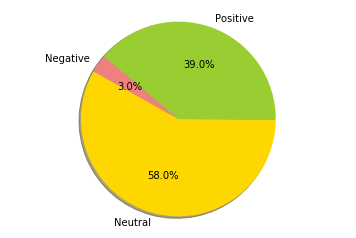

In [165]:
labels = 'Negative','Neutral','Positive'
sizes = [s["created_at"][0],s["created_at"][1],s["created_at"][2]]
colors = ['lightcoral', 'gold','yellowgreen' ]
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [204]:
import time
ts1=[]
for tweet in df_clean['created_at']:
    ts1.append(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet,'%a %b %d %H:%M:%S +0000 %Y')))
df_clean["time"]=pd.Series(ts1)
df_clean.head(1)

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,created_at,favorite_count,retweet_count,text,entities,Sentiment,Polarity,Subjectivity,time
0,Sun Mar 31 07:05:03 +0000 2019,4826,995,Thank you for an incredible Day 2!\n\nSee you ...,"{'hashtags': [{'text': 'Ultra2019', 'indices':...",Positive,0.5,0.483333,2019-03-31 07:05:03


In [205]:
df_sort=df_clean.sort_values(by='time')
df_sort=df_sort.reset_index()
df_sort.iloc[699]


index                                                            15
created_at                           Wed Mar 27 23:46:59 +0000 2019
favorite_count                                                    0
retweet_count                                                  1017
text              RT @ultra: MIAMI, ARE YOU READY?\n\nOnly 2 mor...
entities          {'hashtags': [{'text': 'Ultra2019', 'indices':...
Sentiment                                                  Positive
Polarity                                                   0.331169
Subjectivity                                               0.511905
time                                            2019-03-31 23:59:38
Name: 699, dtype: object

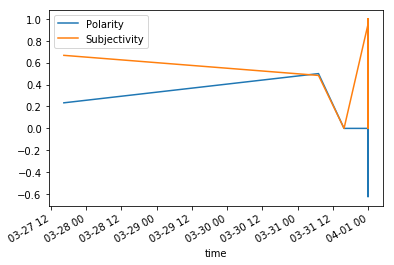

In [206]:
df_sort["time"] = pd.to_datetime(df_sort['time'])
df_sort.plot(x="time", y=["Polarity","Subjectivity"])
plt.show()

In [216]:
ultra1_csv = df.to_csv("ultra7.csv")

In [231]:
df['entities'][0][0][0][0]

0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [], 'symbols': [], 'user_mentions...
0    {'hashtags': [{'text': 'Ultra2019', 'indices':...
0    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, dtype: object